<a href="https://colab.research.google.com/github/SidharrthSingh25/ML/blob/master/ASSIGNMENT_8/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. DATA PREPROCESSING

1.1 IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1.2 IMPORTING DATASETS

In [2]:
dataset_1 = pd.read_csv ('datasets_721951_1255613_Country-data.csv')
dataset_2 = pd.read_csv ('datasets_721951_1255613_data-dictionary.csv')
X = dataset_1.iloc [ : , [1,2,3,4,5,6,7,8,9]].values

1.3 STRONGLY CORRELATED FEATURES

            child_mort   exports    health  ...  life_expec  total_fer      gdpp
child_mort    1.000000 -0.318093 -0.200402  ...   -0.886676   0.848478 -0.483032
exports      -0.318093  1.000000 -0.114408  ...    0.316313  -0.320011  0.418725
health       -0.200402 -0.114408  1.000000  ...    0.210692  -0.196674  0.345966
imports      -0.127211  0.737381  0.095717  ...    0.054391  -0.159048  0.115498
income       -0.524315  0.516784  0.129579  ...    0.611962  -0.501840  0.895571
inflation     0.288276 -0.107294 -0.255376  ...   -0.239705   0.316921 -0.221631
life_expec   -0.886676  0.316313  0.210692  ...    1.000000  -0.760875  0.600089
total_fer     0.848478 -0.320011 -0.196674  ...   -0.760875   1.000000 -0.454910
gdpp         -0.483032  0.418725  0.345966  ...    0.600089  -0.454910  1.000000

[9 rows x 9 columns]


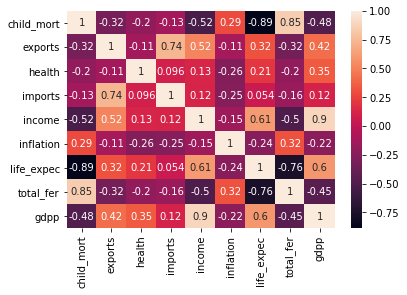

In [3]:
df = pd.DataFrame (X, columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'])
corr_Matrix = df.corr ()
print (corr_Matrix)
sbn.heatmap (corr_Matrix, annot = True)
plt.show ()

In [4]:
X_1 = dataset_1.iloc [ : , [1,8]].values
X_2 = dataset_1.iloc [ : , [5,9]].values

In [5]:
print (X_1)

[[ 90.2    5.82]
 [ 16.6    1.65]
 [ 27.3    2.89]
 [119.     6.16]
 [ 10.3    2.13]
 [ 14.5    2.37]
 [ 18.1    1.69]
 [  4.8    1.93]
 [  4.3    1.44]
 [ 39.2    1.92]
 [ 13.8    1.86]
 [  8.6    2.16]
 [ 49.4    2.33]
 [ 14.2    1.78]
 [  5.5    1.49]
 [  4.5    1.86]
 [ 18.8    2.71]
 [111.     5.36]
 [ 42.7    2.38]
 [ 46.6    3.2 ]
 [  6.9    1.31]
 [ 52.5    2.88]
 [ 19.8    1.8 ]
 [ 10.5    1.84]
 [ 10.8    1.57]
 [116.     5.87]
 [ 93.6    6.26]
 [ 44.4    2.88]
 [108.     5.11]
 [  5.6    1.63]
 [ 26.5    2.67]
 [149.     5.21]
 [150.     6.59]
 [  8.7    1.88]
 [ 15.7    1.59]
 [ 18.6    2.01]
 [ 88.2    4.75]
 [116.     6.54]
 [ 63.9    4.95]
 [ 10.2    1.92]
 [111.     5.27]
 [  5.5    1.55]
 [  3.6    1.42]
 [  3.4    1.51]
 [  4.1    1.87]
 [ 34.4    2.6 ]
 [ 25.1    2.66]
 [ 29.1    3.19]
 [ 19.2    2.27]
 [111.     5.21]
 [ 55.2    4.61]
 [  4.5    1.72]
 [ 24.1    2.67]
 [  3.     1.87]
 [  4.2    2.03]
 [ 63.7    4.08]
 [ 80.3    5.71]
 [ 16.5    1.92]
 [  4.2    1.3

In [6]:
print (X_2)

[[  1610    553]
 [  9930   4090]
 [ 12900   4460]
 [  5900   3530]
 [ 19100  12200]
 [ 18700  10300]
 [  6700   3220]
 [ 41400  51900]
 [ 43200  46900]
 [ 16000   5840]
 [ 22900  28000]
 [ 41100  20700]
 [  2440    758]
 [ 15300  16000]
 [ 16200   6030]
 [ 41100  44400]
 [  7880   4340]
 [  1820    758]
 [  6420   2180]
 [  5410   1980]
 [  9720   4610]
 [ 13300   6350]
 [ 14500  11200]
 [ 80600  35300]
 [ 15300   6840]
 [  1430    575]
 [   764    231]
 [  2520    786]
 [  2660   1310]
 [ 40700  47400]
 [  5830   3310]
 [   888    446]
 [  1930    897]
 [ 19400  12900]
 [  9530   4560]
 [ 10900   6250]
 [  1410    769]
 [   609    334]
 [  5190   2740]
 [ 13000   8200]
 [  2690   1220]
 [ 20100  13500]
 [ 33900  30800]
 [ 28300  19800]
 [ 44000  58000]
 [ 11100   5450]
 [  9350   4660]
 [  9860   2600]
 [  7300   2990]
 [ 33700  17100]
 [  1420    482]
 [ 22700  14600]
 [  7350   3650]
 [ 39800  46200]
 [ 36900  40600]
 [ 15400   8750]
 [  1660    562]
 [  6730   2960]
 [ 40400  4180

## 2. CHILD MORTALITY vs TOTAL FERTILITY

2.1 OPTIMUM NUMBER OF CLUSTERS (DENDROGRAM)

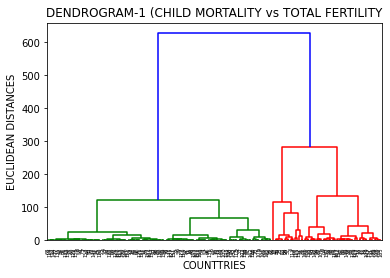

In [7]:
from scipy.cluster import hierarchy as hc
dendrogram = hc.dendrogram (hc.linkage (X_1, method = 'ward'))
plt.title ('DENDROGRAM-1 (CHILD MORTALITY vs TOTAL FERTILITY')
plt.xlabel ('COUNTTRIES')
plt.ylabel ('EUCLIDEAN DISTANCES')
plt.show ()

2.2 TRAINING HIERARCHICAL MODEL ON DATASET

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc_1 = AgglomerativeClustering (n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc_1 = hc_1.fit_predict (X_1)

In [9]:
print (y_hc_1)

[0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0]


2.3 VISUALISING CLUSTERS

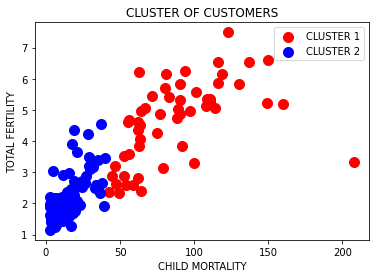

In [18]:
plt.scatter (X_1 [y_hc_1 == 0, 0], X_1 [y_hc_1 == 0, 1], s = 100, c = 'red', label = 'CLUSTER 1')
plt.scatter (X_1 [y_hc_1 == 1, 0], X_1 [y_hc_1 == 1, 1], s = 100, c = 'blue', label = 'CLUSTER 2')
plt.title('CLUSTER OF CUSTOMERS')
plt.xlabel('CHILD MORTALITY')
plt.ylabel('TOTAL FERTILITY')
plt.legend()
plt.show()

## 3. INCOME vs GDPP

3.1 OPTIMUM NUMBER OF CLUSTERS (DENDROGRAM)

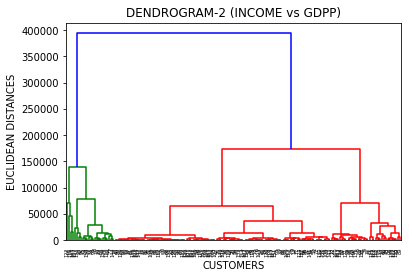

In [11]:
from scipy.cluster import hierarchy as hc
dendrogram = hc.dendrogram (hc.linkage (X_2, method = 'ward'))
plt.title ('DENDROGRAM-2 (INCOME vs GDPP)')
plt.xlabel ('CUSTOMERS')
plt.ylabel ('EUCLIDEAN DISTANCES')
plt.show ()

3.2 TRAINING HIERARCHICAL MODEL ON TRAINING SET

In [15]:
hc_2 = AgglomerativeClustering (n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc_2 = hc_2.fit_predict (X_2)

In [16]:
print (y_hc_2)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


3.3 VISUALISING CLUSTERS

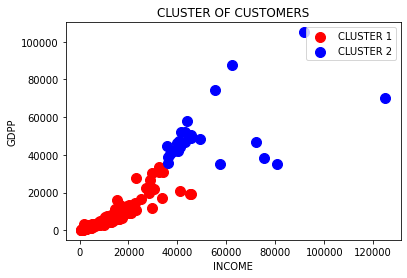

In [19]:
plt.scatter(X_2[y_hc_2 == 0, 0], X_2[y_hc_2 == 0, 1], s = 100, c = 'red', label = 'CLUSTER 1')
plt.scatter(X_2[y_hc_2 == 1, 0], X_2[y_hc_2 == 1, 1], s = 100, c = 'blue', label = 'CLUSTER 2')
plt.title('CLUSTER OF CUSTOMERS')
plt.xlabel('INCOME')
plt.ylabel('GDPP')
plt.legend()
plt.show()